In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Localization Overview

## robot and 5 cells example
Robot sensor is 0.6 accurate to know it’s in a red cell, 0.2 for green.

Prob. of being in any cell is 0.2

Probs do not add to one so divide by sum 0.36 to get the posterior distribution, prob of being in Xi given Z.

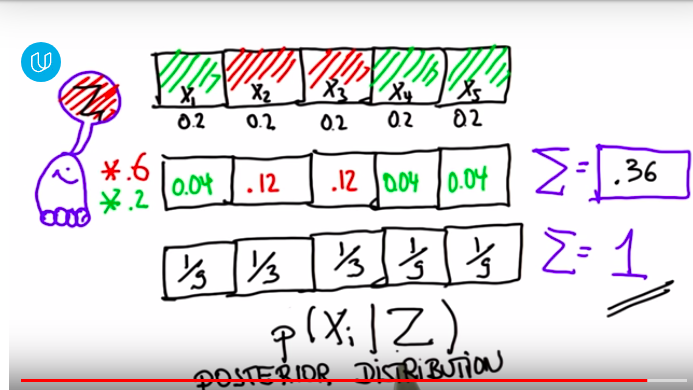

in the snippet below, notice how hit is either 1 or 0 to get multiplication only by either pHit or pMiss

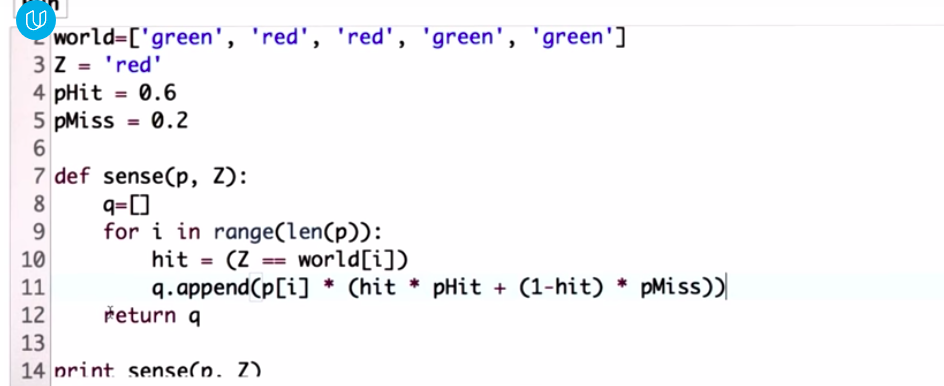

In [2]:
"""
Localization overview
"""
#Modify the move function to accommodate the added 
#probabilities of overshooting or undershooting 
#the intended destination.

p=[0, 1, 0, 0, 0]
world=['green', 'red', 'red', 'green', 'green']
measurements = ['red', 'green']
# example was default measurement of red so likelihood of being in red given red measurement
# and likelihood of being in red and calling it wrong (green or other)
pHit = 0.6
pMiss = 0.2

#inaccurate movement probabilities
pExact = 0.8
pOvershoot = 0.1
pUndershoot = 0.1
"""
in the limit, the above inaccuracy results in a uniform distribution of q since the 0.8 becomes
diluted, ie. to 0.64 and so on
Take the example of being in pos 4 or x4 at time t, which corresponds to position at time t-1
If U=3, then 0.8*x2, 0.1*x3 and 0.1*x1 and these multiplied by uniform distribution of 0.2 for x1 to x5
is also equal to 0.2.  Thus, it is the only solution in the limit
"""

def sense(p, Z):
    """
    p is prob. distribution of locations and Z is the sensed color
    depending on what the world state actually is, multiply the accuracy of sensor with either hit or
    (1-hit) which is zero in this case,normalize the probabilities to equal one and return the new
    distribution.  It should be more accurate and certain than before.
    """
    q=[]
    for i in range(len(p)):
        # we detected Z in spot i of the world, hit==True 1 or False 0
        hit = (Z == world[i])
        #prob of being in a spot * (prob of sensing correctly OR prob of sensing incorrectly)
        # gives us unnormalized conditional prob of being in a spot given measurement
        # ex. for red measurement and red zone: 0.2 * 1 * 0.6
        # prob of being in red given the red measurement
        q.append(p[i] * (hit * pHit + (1-hit) * pMiss))
    s = sum(q)
    for i in range(len(q)):
        q[i] = q[i] / s
    return q

def move(p, U):
    """
    return the new location probs q after moving by U.
    param p: the old probabilities of location
    """
    q = []
    for i in range(len(p)):
        s = pExact * p[(i-U) % len(p)] #get the prob of starting cell with (i-U)
        s = s + pOvershoot * p[(i-U-1) % len(p)]
        s = s + pUndershoot * p[(i-U+1) % len(p)]
        q.append(s)

    return q

In [3]:
print (move(p,1))

[0.0, 0.1, 0.8, 0.1, 0.0]


In [5]:
# test whether we get closer to uniform distribution in the limit
for i in range(1000):
    p = move(p,1)
print(p)

[0.20000000000000365, 0.20000000000000373, 0.20000000000000365, 0.2000000000000035, 0.2000000000000035]


## Entropy
Entropy represents amount of uncertainty in system.  Measurement with sensors decreases this but moving increases it.  
Max entropy when possible positions have uniform distribution.
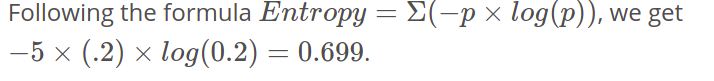
If after moving, sense position and probs become [0.05, 0.05, 0,05,0.8,0.05], entropy decreases to 0.338

In [7]:
#Given the list motions=[1,1] which means the robot 
#moves right and then right again, compute the posterior 
#distribution if the robot first senses red, then moves 
#right one, then senses green, then moves right again, 
#starting with a uniform prior distribution.

p=[0.2, 0.2, 0.2, 0.2, 0.2]
world=['green', 'red', 'red', 'green', 'green']
measurements = ['red', 'green']
motions = [1,1] #this is a list of motions U, -1 is move to left

for i in range(len(motions)):
    '''
    measurements has only 2 elements red, green so we need the mod 
    '''
    sensed_color = i % len(measurements) # either 1 or 0, if 1 it's the second color green
    p = sense(p, measurements[sensed_color])
    p = move(p, motions[i])
    
print(p)

[0.21157894736842103, 0.1515789473684211, 0.08105263157894739, 0.16842105263157897, 0.3873684210526316]


## solution:  
in this world, it probably started at pos=2 (index starts at 0) because that is where it is red then green.  Thus after two moves of 1, it's likely that it's in pos=4

# Bayes Rule
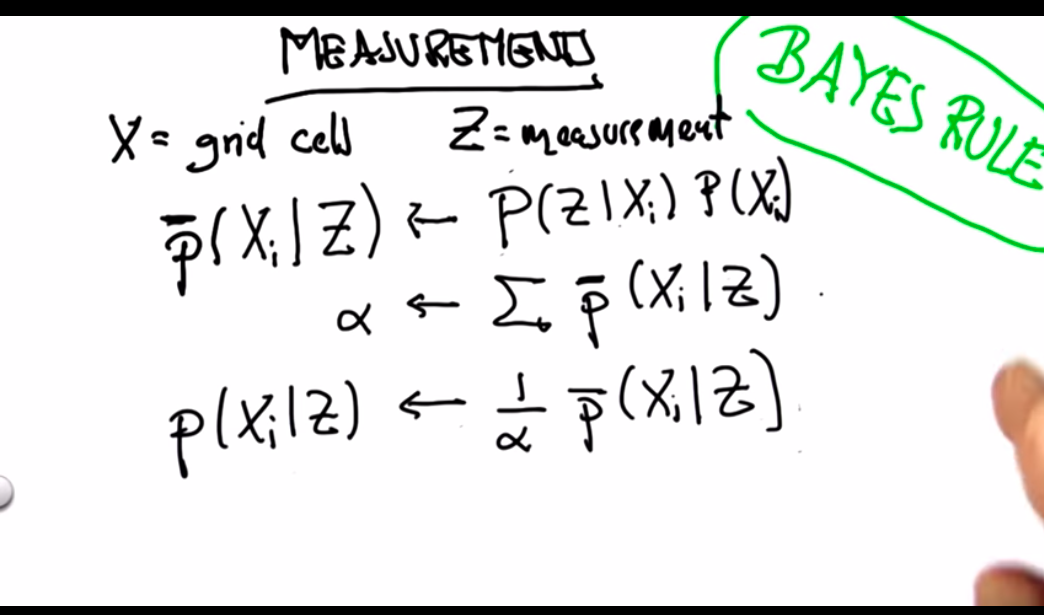

## Lesson 2: Problem Set 1
## Quiz Localization Program

### memory scales exponentially in number of state variables 
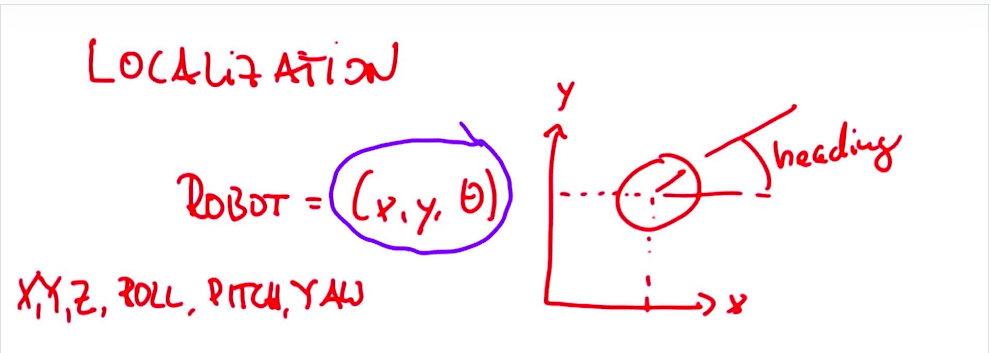


In [3]:
# The function localize takes the following arguments:
#
# colors:
#        2D list, each entry either 'R' (for red cell) or 'G' (for green cell)
#
# measurements:
#        list of measurements taken by the robot, each entry either 'R' or 'G'
#
# motions:
#        list of actions taken by the robot, each entry of the form [dy,dx],
#        where dx refers to the change in the x-direction (positive meaning
#        movement to the right) and dy refers to the change in the y-direction
#        (positive meaning movement downward)
#        NOTE: the *first* coordinate is change in y; the *second* coordinate is
#              change in x
#
# sensor_right:
#        float between 0 and 1, giving the probability that any given
#        measurement is correct; the probability that the measurement is
#        incorrect is 1-sensor_right
#
# p_move:
#        float between 0 and 1, giving the probability that any given movement
#        command takes place; the probability that the movement command fails
#        (and the robot remains still) is 1-p_move; the robot will NOT overshoot
#        its destination in this exercise
#
# The function should RETURN (not just show or print) a 2D list (of the same
# dimensions as colors) that gives the probabilities that the robot occupies
# each cell in the world.
#
# Compute the probabilities by assuming the robot initially has a uniform
# probability of being in any cell.
#
# Also assume that at each step, the robot:
# 1) first makes a movement,
# 2) then takes a measurement.
#
# Motion:
#  [0,0] - stay
#  [0,1] - right
#  [0,-1] - left
#  [1,0] - down
#  [-1,0] - up

def sense(p, measurement, colors, sensor_right):
    """
    p is prob. distribution of locations and Z is the sensed color
    depending on what the world state actually is, multiply the accuracy of sensor with either hit or
    (1-hit) which is zero in this case,normalize the probabilities to equal one and return the new
    distribution.  It should be more accurate and certain than before.
    """
    #q=p.copy()
    q = [[0.0 for row in range(len(p[0]))] for col in range(len(p))]
    '''
    #initialize to zero
    for w in range(len(q)):
        for z in range(len(q[w])):
            q[w][z]=0
    '''        
    for i in range(len(p)):
        for j in range(len(p[0])):
            # we detected Z in spot i of the world, hit==True 1 or False 0
            hit = (measurement == colors[i][j])
            #prob of being in a spot * (prob of sensing correctly OR prob of sensing incorrectly)
            # gives us unnormalized conditional prob of being in a spot given measurement
            # ex. for red measurement and red zone: 0.2 * 1 * 0.6
            # prob of being in red given the red measurement
            q[i][j]=(p[i][j] * (hit * sensor_right + (1-hit) * (1 - sensor_right)))
    
    s = sum([sum(i) for i in q])
    
    for k in range(len(q)):
        for m in range(len(q[k])):
            q[k][m] = q[k][m] / s
    return q

def move(p, U, p_move):
    """
    return the new location probs q after moving by U.
    param U: array of size 2 [dy, dx] of move 
    param p: the old probabilities of location
    """
    #q = p.copy()
    q = [[0.0 for row in range(len(p[0]))] for col in range(len(p))]
    '''
    #initialize to zero
    for w in range(len(q)):
        for z in range(len(q[w])):
            q[w][z]=0
    '''
    p_stay = 1 - p_move
    for i in range(len(p)):
        for j in range(len(p[i])):
            s = p_move * p[(i-U[0]) % len(p)][(j-U[1]% len(p[i]))]
            # need a prob for p_stay = (1 - p_move)
            # p_stay * the prior that is there
            s = s + p_stay * p[i][j]
            q[i][j]=s
        # try normalizing here
        #total = sum([sum(i) for i in q])
    '''
    for k in range(len(q)):
        for m in range(len(q[k])):
            q[k][m] = q[k][m] / total
    '''
    return q

def localize(colors,measurements,motions,sensor_right,p_move):
    # initializes p to a uniform distribution over a grid of the same dimensions as colors
    pinit = 1.0 / float(len(colors)) / float(len(colors[0]))
    p = [[pinit for row in range(len(colors[0]))] for col in range(len(colors))]
    
    # >>> Insert your code here <<<
    for i in range(len(motions)):
        p = move(p, motions[i],p_move)
        p = sense(p, measurements[i], colors, sensor_right)
    
    return p

def show(p):
    rows = ['[' + ','.join(map(lambda x: '{0:.5f}'.format(x),r)) + ']' for r in p]
    print('[' + ',\n '.join(rows) + ']')
    
#############################################################
# For the following test case, your output should be 
# [[0.01105, 0.02464, 0.06799, 0.04472, 0.02465],
#  [0.00715, 0.01017, 0.08696, 0.07988, 0.00935],
#  [0.00739, 0.00894, 0.11272, 0.35350, 0.04065],
#  [0.00910, 0.00715, 0.01434, 0.04313, 0.03642]]
# (within a tolerance of +/- 0.001 for each entry)

colors = [['R','G','G','R','R'],
          ['R','R','G','R','R'],
          ['R','R','G','G','R'],
          ['R','R','R','R','R']]
measurements = ['G','G','G','G','G']
motions = [[0,0],[0,1],[1,0],[1,0],[0,1]]
p = localize(colors,measurements,motions,sensor_right = 0.7, p_move = 0.8)
show(p) # displays your answer


[[0.01106,0.02464,0.06800,0.04472,0.02465],
 [0.00715,0.01017,0.08697,0.07988,0.00935],
 [0.00740,0.00894,0.11273,0.35351,0.04066],
 [0.00911,0.00715,0.01435,0.04313,0.03643]]


In [8]:
# test 1
colors = [['G', 'G', 'G'],
          ['G', 'R', 'G'],
          ['G', 'G', 'G']]
measurements = ['R']
motions = [[0,0]]
sensor_right = 1.0
p_move = 1.0
p = localize(colors,measurements,motions,sensor_right,p_move)
print("", p[0], "\n", p[1], "\n", p[2])

 [0.0, 0.0, 0.0] 
 [0.0, 1.0, 0.0] 
 [0.0, 0.0, 0.0]


In [10]:
# test 2
colors = [['G', 'G', 'G'],
          ['G', 'R', 'R'],
          ['G', 'G', 'G']]
measurements = ['R']
motions = [[0,0]]
sensor_right = 1.0
p_move = 1.0
p = localize(colors,measurements,motions,sensor_right,p_move)
print("", p[0], "\n", p[1], "\n", p[2])

 [0.0, 0.0, 0.0] 
 [0.0, 0.5, 0.5] 
 [0.0, 0.0, 0.0]


In [11]:
# test 3
colors = [['G', 'G', 'G'],
          ['G', 'R', 'R'],
          ['G', 'G', 'G']]
measurements = ['R']
motions = [[0,0]]
sensor_right = 0.8
p_move = 1.0
p = localize(colors,measurements,motions,sensor_right,p_move)
print("", p[0], "\n", p[1], "\n", p[2])

 [0.06666666666666665, 0.06666666666666665, 0.06666666666666665] 
 [0.06666666666666665, 0.2666666666666667, 0.2666666666666667] 
 [0.06666666666666665, 0.06666666666666665, 0.06666666666666665]


# Do not modify list elements in place, make a new empty list instead of list.copy() and hoping to edit elements!!!

## This was Monte Carlo localization with histogram filters.  

## simultaneous localization and mapping = SLAM